In [7]:
# MY TOOL BOX
# Data Handling
import pandas as pd            # For data loading and manipulation (DataFrames)
import numpy as np             # For numerical computations, arrays, and statistical functions

# Visualization
import matplotlib.pyplot as plt  # Basic plotting (line charts, histograms, etc.)
import seaborn as sns            # Advanced visualizations with better aesthetics

# Machine Learning Models
from sklearn.linear_model import LinearRegression      # Simple linear regression
from sklearn.neighbors import KNeighborsRegressor      # K-NN regression
from sklearn.ensemble import RandomForestClassifier     # Ensemble tree-based classifier
from sklearn.linear_model import LogisticRegression     # Binary classification model
import xgboost as xgb                                   # Boosted trees for high-performance ML

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder          # Convert categories to numbers
from sklearn.model_selection import train_test_split    # Split dataset into training/testing

# Model Evaluation (Regression)
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression models

# Model Evaluation (Classification)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Model Interpretation
from sklearn.inspection import permutation_importance     # Understand feature importance

# Output Formatting
from tabulate import tabulate             # Nicely format tables (e.g., model results)

# ⚙️ Environment Setup
import random                             # Control randomness for reproducibility
import warnings                           # Suppress warning messages
import scipy.stats as stats               # Extra statistical tools

# Styling & Control
sns.set(style='whitegrid', palette='muted', color_codes=True)  # Set visualization style
random.seed(42)
np.random.seed(42)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"/kaggle/input/netflix-tv-shows-and-movies/Netflix.csv")

In [9]:
def auto_eda(df):

    # Clean the data first
    df = df.drop_duplicates()

    # Drop columns with >80% missing values
    threshold = 0.8
    df = df.loc[:, df.isnull().mean() < threshold]

    # Dataset shape
    print("Shape:", df.shape)

    # First and last rows
    print("\n Head:\n ")
    display(df.head())
    print("\n Tail:\n ")
    display(df.tail())

    # Descriptive statistics
    print("\n Description:\n", df.describe(include='all'))

    # Missing values per column
    print("\n Null Values:\n", df.isnull().sum())

    # Duplicate row count (after cleaning should be zero)
    print("\n Duplicate Rows:", df.duplicated().sum())

    # Data types
    print("\n Data Types:\n", df.dtypes)

    # Unique values count
    print("\n Unique Value Counts:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    # Skewness of numeric columns
    print("\n Column Skewness:")
    skew_values = df.select_dtypes(include=np.number).skew()
    print(skew_values)

    # Correlation heatmap (if >1 numeric columns)
    numeric_cols = df.select_dtypes(include=np.number)
    if numeric_cols.shape[1] > 1:
        print("\n Correlation Heatmap:")
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Matrix")
        plt.tight_layout()
        plt.show()

    # ✅ Final cleaned dataset returned
    return df

In [10]:
auto_eda(df)

Shape: (200, 12)

 Head:
 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



 Tail:
 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
195,s196,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,27-Aug-21,2008,TV-14,128 min,"Comedies, Dramas, International Movies",A bank hires an enigmatic and unorthodox debt ...
196,s197,Movie,He's All That,Mark Waters,"Addison Rae, Tanner Buchanan, Rachael Leigh Co...",NaN,27-Aug-21,2021,TV-14,92 min,"Comedies, Romantic Movies",An influencer specializing in makeovers bets s...
197,s198,TV Show,I Heart Arlo,NaN,"Michael J. Woodard, Mary Lambert, Jonathan Van...",NaN,27-Aug-21,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,27-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
199,s200,Movie,Koi Aap Sa,Partho Mitra,"Aftab Shivdasani, Natassha, Dipannita Sharma, ...",India,27-Aug-21,2006,TV-14,135 min,"Comedies, Dramas, International Movies",Star athlete Rohan has his eye on a beautiful ...



 Description:
        show_id   type                 title           director  \
count      200    200                   200                137   
unique     200      2                   200                123   
top         s1  Movie  Dick Johnson Is Dead  Toshiya Shinohara   
freq         1    127                     1                  4   
mean       NaN    NaN                   NaN                NaN   
std        NaN    NaN                   NaN                NaN   
min        NaN    NaN                   NaN                NaN   
25%        NaN    NaN                   NaN                NaN   
50%        NaN    NaN                   NaN                NaN   
75%        NaN    NaN                   NaN                NaN   
max        NaN    NaN                   NaN                NaN   

                                              cast        country date_added  \
count                                          180            136        200   
unique                         

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
195,s196,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,27-Aug-21,2008,TV-14,128 min,"Comedies, Dramas, International Movies",A bank hires an enigmatic and unorthodox debt ...
196,s197,Movie,He's All That,Mark Waters,"Addison Rae, Tanner Buchanan, Rachael Leigh Co...",NaN,27-Aug-21,2021,TV-14,92 min,"Comedies, Romantic Movies",An influencer specializing in makeovers bets s...
197,s198,TV Show,I Heart Arlo,NaN,"Michael J. Woodard, Mary Lambert, Jonathan Van...",NaN,27-Aug-21,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,27-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...


## Movies vs TV Shows
##### Shows the split between movies and TV shows on Netflix — movies dominate, but TV content has grown steadily in recent years.

<Axes: xlabel='type', ylabel='count'>

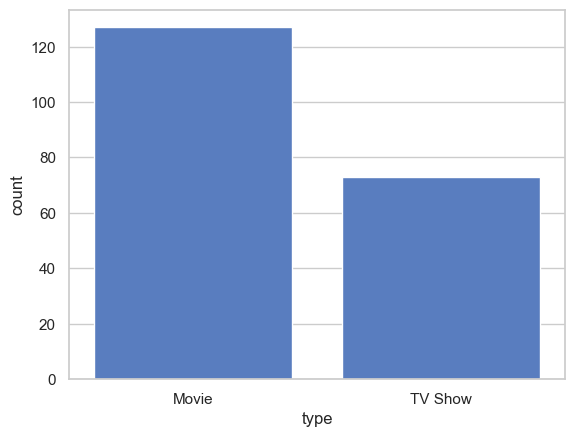

In [11]:
sns.countplot(x='type', data=df)

## Release Trends Over Time
##### Highlights how Netflix’s content library expanded rapidly from 2015 onward, reflecting the platform’s aggressive production strategy.

<Axes: xlabel='release_year', ylabel='Count'>

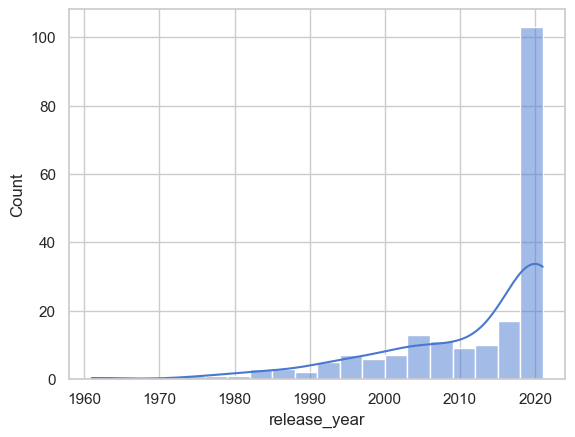

In [12]:
sns.histplot(df['release_year'], bins=20, kde=True)

## Top Producing Countries
##### Reveals which countries contribute the most titles, with the U.S. leading, followed by India, UK, and other global players.

<Axes: ylabel='country'>

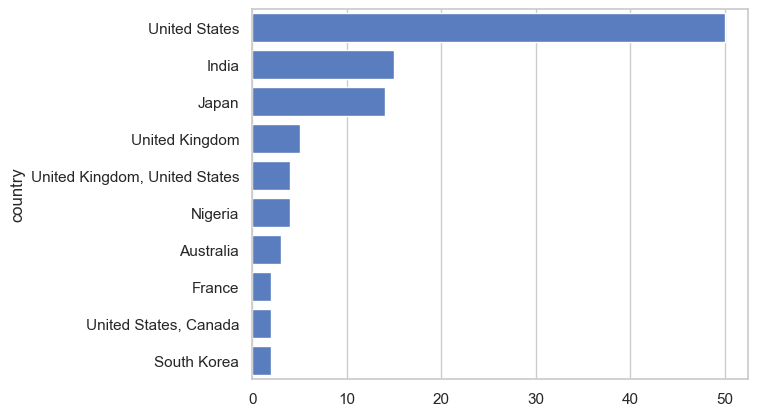

In [13]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)

## Most Common Ratings
##### Displays the most frequently assigned ratings (like TV-MA and PG-13), offering insight into the platform's target audiences.

<Axes: xlabel='count', ylabel='rating'>

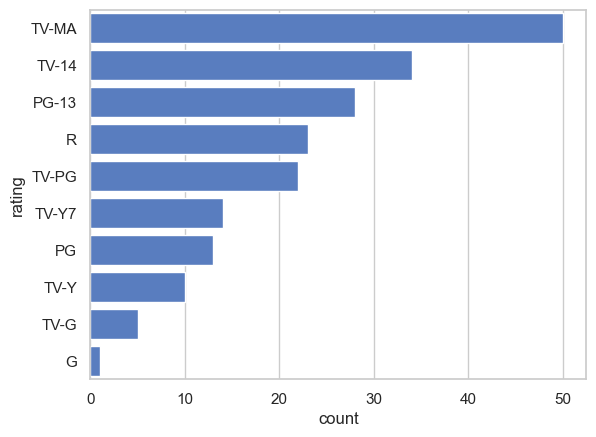

In [14]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)

## Popular Categories / Genres
Unpacks genre popularity — drama, comedy, and documentaries are among the top, reflecting viewer preferences across regions

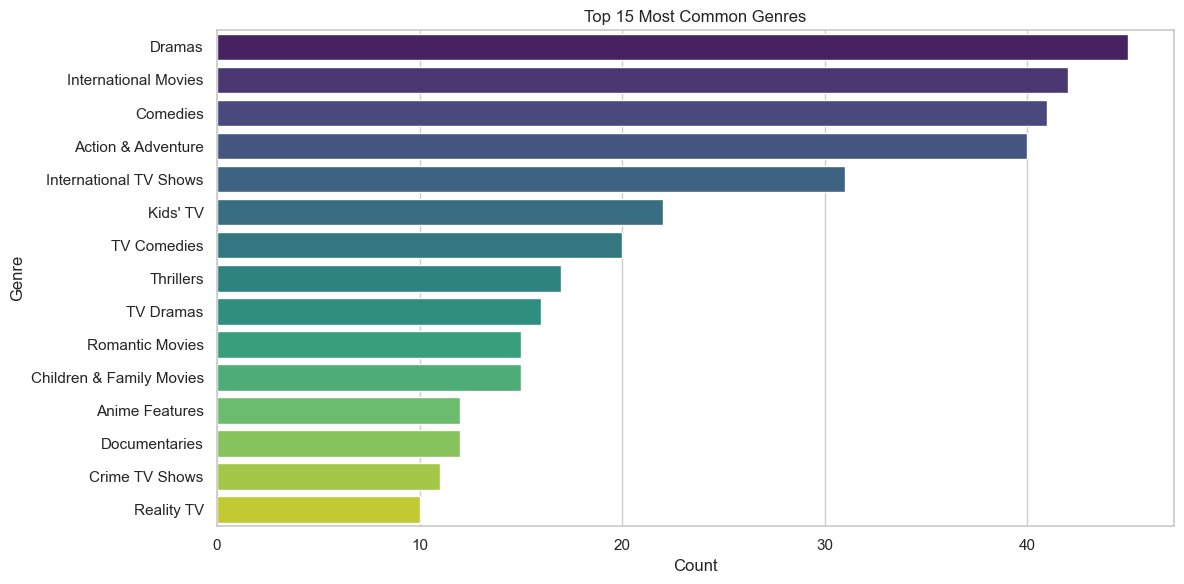

In [15]:
# Drop missing values
genres_series = df['listed_in'].dropna().str.split(', ')
# Flatten into a single list
genres_flat = [genre for sublist in genres_series for genre in sublist]
from collections import Counter
# Count frequency
genre_counts = Counter(genres_flat)
# Convert to DataFrame for easy plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='viridis')
plt.title('Top 15 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## TV Show and Movie Duration Analysi
Analyzes duration formats separately for movies and TV shows.
For movies, we look at the most common lengths in minutes — revealing trends in typical runtime.
For TV shows, we examine how many seasons each series has, showcasing popular series length across Netflix’s catalog

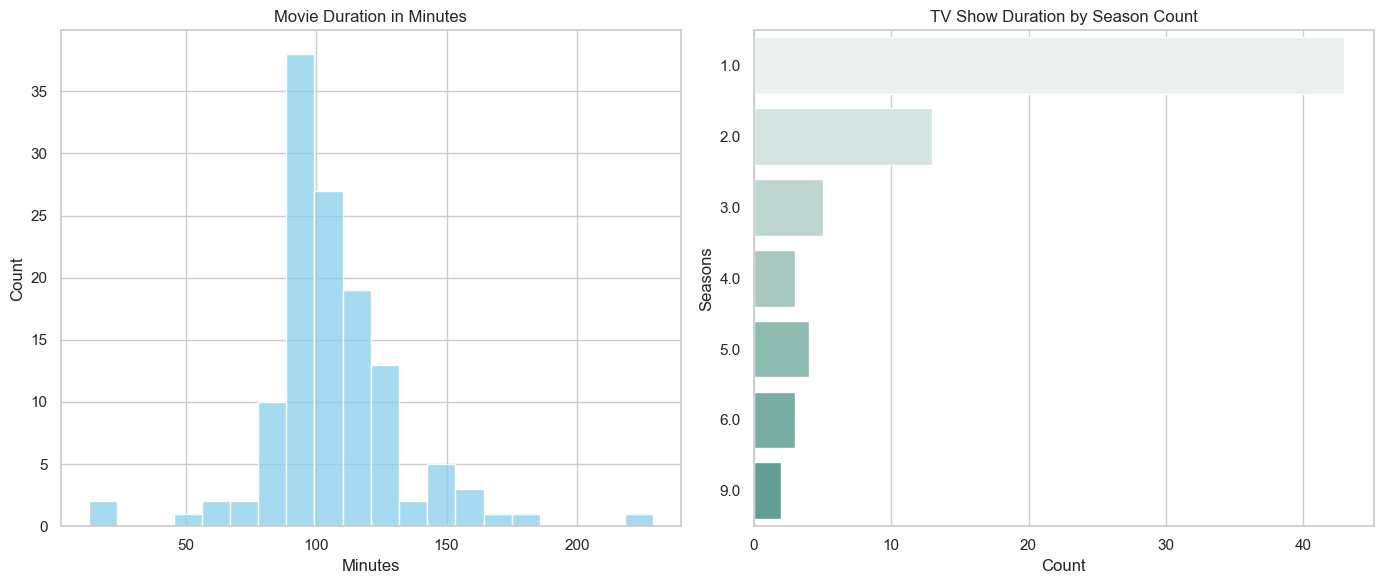

In [16]:
# Prepare data
movies = df[df['type'] == 'Movie'].copy()
movies['minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)

tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['season_count'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Movie Duration Histogram
sns.histplot(movies['minutes'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Movie Duration in Minutes')
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Count')

# TV Show Season Count
sns.countplot(y='season_count', data=tv_shows, ax=axes[1], palette='light:#5A9')
axes[1].set_title('TV Show Duration by Season Count')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Seasons')

plt.tight_layout()
plt.show()

## Actor Frequency Analysis
Identifies the most featured actors, revealing recurring faces in Netflix originals and popular content.

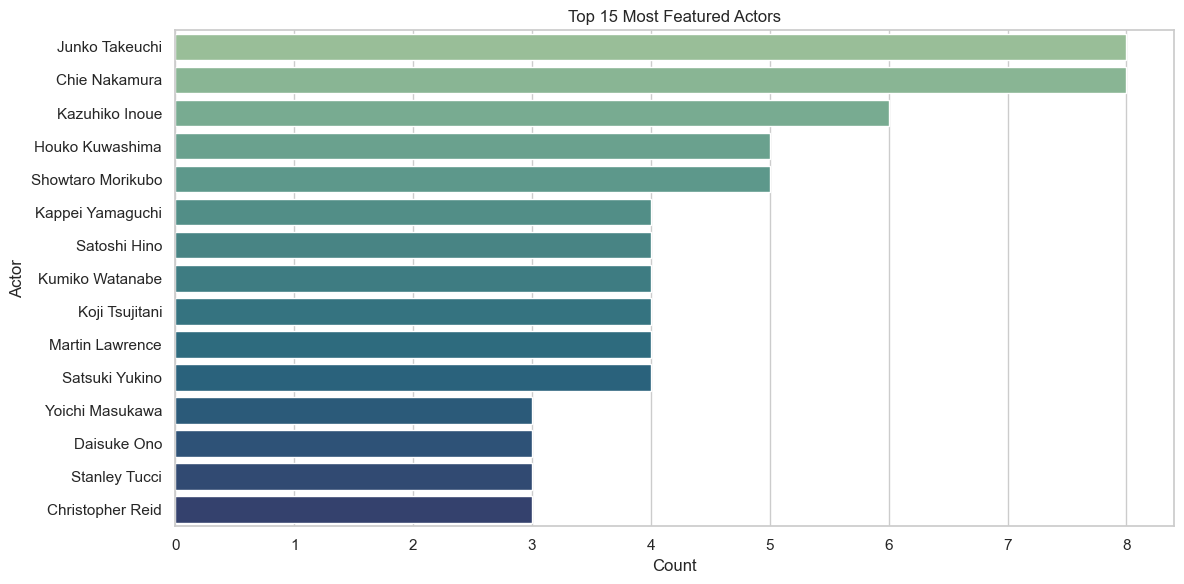

In [17]:
# Explode cast names and count top appearances
cast_series = df['cast'].dropna().str.split(', ')
cast_flat = [actor.strip() for sublist in cast_series for actor in sublist]

# Count and visualize top actors
actor_counts = Counter(cast_flat)
actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=actor_df.head(15), x='Count', y='Actor', palette='crest')
plt.title('Top 15 Most Featured Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

## Genre-based word cloud
This visualization shows the most common genres in the Netflix dataset. Each word represents a genre or category, and its size reflects how frequently that genre appears across the dataset.
- Larger words = More frequent genres
- Smaller words = Less frequent
This gives a quick glance at the types of content Netflix features most prominently

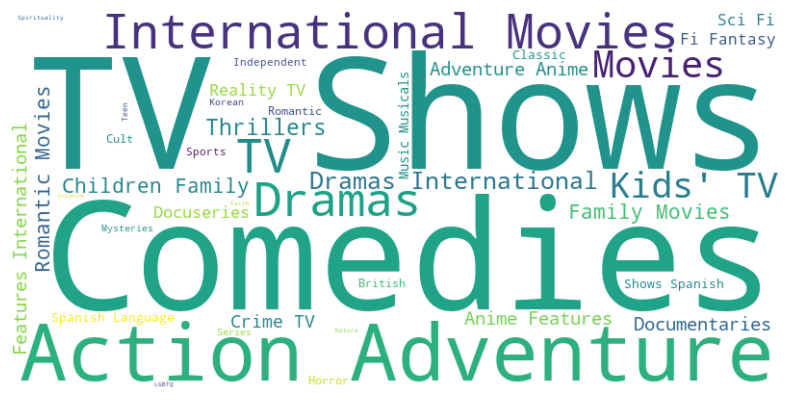

In [18]:
from wordcloud import WordCloud
# Drop missing values from the 'listed_in' genre column
df = df.dropna(subset=['listed_in'])
# Create a long string of all genres
genre_text = ' '.join(df['listed_in'].tolist())
# Generate and show the word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Recommender System
A built-in feature that helps you discover similar movies or shows based on genre and storyline — just enter a title, and let it suggest your next binge!

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
df['listed_in'] = df['listed_in'].fillna('')
df['description'] = df['description'].fillna('')

# Combine genre + description
df['combo'] = df['listed_in'] + " " + df['description']

# Vectorize
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combo'])

# Define recommender
def recommend(title):
    title = title.lower()
    if title not in df['title'].str.lower().values:
        return "Title not found."
    idx = df[df['title'].str.lower() == title].index[0]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_idxs = sim_scores.argsort()[-6:-1][::-1]
    return df.iloc[similar_idxs][['title', 'listed_in', 'description']]

In [21]:
recommend("EMI: Liya Hai To Chukana Padega")

,title,listed_in,description
107,A Champion Heart,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...
61,Naruto the Movie 2: Legend of the Stone of Gelel,"Action & Adventure, Anime Features, Internatio...","While on a mission to return a missing pet, Na..."
60,Naruto Shippuden: The Movie: The Lost Tower,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."
145,House Party 2,"Comedies, Cult Movies, Music & Musicals",Kid goes off to college with scholarship money...
110,Money Heist: From Tokyo to Berlin,"Docuseries, International TV Shows, Spanish-La...","The filmmakers and actors behind ""Money Heist""..."
